<a href="https://colab.research.google.com/github/Sabbir1177/ML-proejct/blob/main/Removing_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/weight-height.csv'

df = pd.read_csv(path)
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

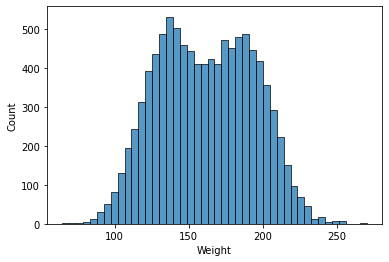

In [7]:
sns.histplot(df['Weight'], kde = False)

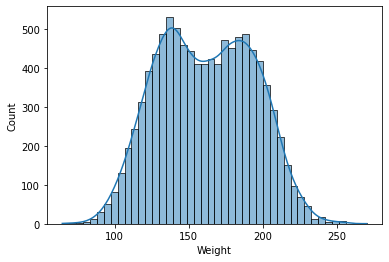

In [8]:
sns.histplot(df['Weight'], kde = True)

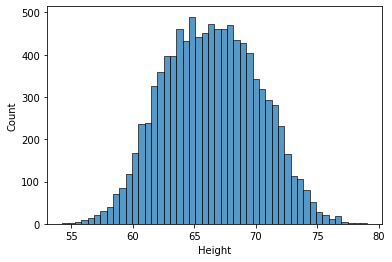

In [9]:
sns.histplot(df['Height'], kde = False)

In [10]:
mean_value = df['Weight'].mean()
mean_value

161.44035683283076

In [11]:
SD_value = df['Weight'].std()
SD_value

32.108439006519546

In [12]:
SD_3 = mean_value + (3 * SD_value)
SD_3

257.7656738523894

In [13]:
neg_SD_3 = mean_value - (3 * SD_value)
neg_SD_3

65.11503981327212

In [14]:
df[df['Weight'] >SD_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [15]:
df[df['Weight'] < neg_SD_3]

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [16]:
marge = df[(df['Weight'] >SD_3) |  (df['Weight'] < neg_SD_3)]
marge

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [17]:
marge.shape

(2, 3)

In [18]:
remove_outliers =  df[(df['Weight'] < SD_3) &  (df['Weight'] > neg_SD_3)]
remove_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [19]:
remove_outliers.shape

(9998, 3)

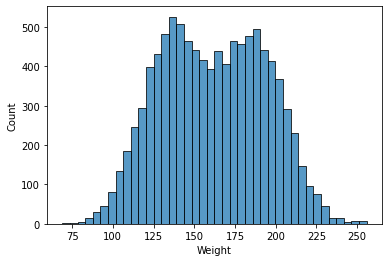

In [20]:
sns. histplot(remove_outliers['Weight'], kde = False)

**one hot encoding**

In [21]:
dummyVariable = pd.get_dummies(remove_outliers['Gender'], drop_first =True)
dummyVariable

,Male
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [22]:
 new_df = remove_outliers.drop('Gender' , axis=1)
 new_df
 

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [23]:
new_df.shape

(9998, 2)

In [24]:
df =pd.concat([new_df , dummyVariable] ,  axis= 1)
df

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [26]:
x = df. drop('Height', axis = 1)
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [29]:
y =df['Height']
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

**model train and test**

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest ,ytrain, ytest  = train_test_split(x,y,test_size=60,random_state=42)

In [57]:
xtrain.shape
 

(9938, 2)

In [58]:
xtest.shape

(60, 2)

**linear regression object**

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lne = LinearRegression()

In [61]:
lne.fit(xtrain , ytrain)

LinearRegression()

In [62]:
lne.coef_

array([ 0.12274576, -0.96519285])

In [63]:
lne.intercept_

47.034126131641884

In [64]:
a = (0.12274576*241.893563180437)+ 47.034126131641884
a

76.72553538333264

In [65]:
lne.predict(xtest)

array([70.17157736, 67.86532082, 66.96240359, 68.37126521, 64.07787473,
       64.96499624, 66.85301663, 60.49411148, 70.75511865, 63.81697861,
       72.74999341, 69.50160796, 62.81690992, 63.2000434 , 70.66647316,
       67.53187007, 68.50630505, 62.29100647, 62.66036236, 70.89334073,
       61.79473479, 69.24312313, 64.39336343, 66.79805898, 60.95951443,
       61.12914812, 68.44660198, 59.45272451, 60.63912634, 62.99944809,
       70.71615694, 68.98231582, 58.18528248, 63.90822021, 61.57500787,
       65.26956832, 65.47420948, 70.5969432 , 65.42355717, 62.57552066,
       61.83174327, 69.74702174, 65.77731111, 72.81362899, 65.65652872,
       66.08975072, 62.31986122, 70.71069532, 66.41575225, 68.78324827,
       72.15058473, 72.25488648, 64.15995354, 62.28064473, 66.23550193,
       68.4931133 , 66.48301743, 62.09618271, 67.46933223, 65.11140979])

**accuracy testign informalway**

In [67]:
lne.score(xtest,ytest)

0.8410899274800099

formal way to check accuracy

In [68]:
from sklearn.metrics import mean_squared_error , r2_score

In [69]:
pred = lne.predict(xtest)


In [70]:
mean_squared_error(ytest , pred)

2.7891714364953146

In [71]:
r2_score(ytest , pred)

0.8410899274800099

Text(0.5, 1.0, 'person weight and dheight ')

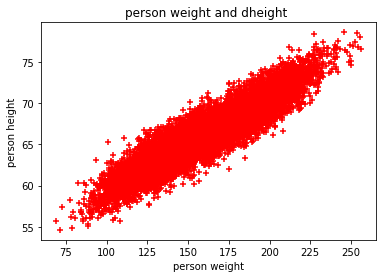

In [83]:
 plt.scatter (df['Weight'] , df['Height'], marker = '+' , color ='red') 
 plt.xlabel('person weight') 
 plt.ylabel('person height') 
 plt.title('person weight and dheight ') 